# Mapping Bike Crashes in LA/ Northridge Biking Isochrones Map  

For the first half of the lab I took the traffic collisiion data for the city of LA and mapped this. To use the traffic collision data, I first had to go through and clean it in excel so that all the points I hd were from bike collisions. After cleaning the data I uploaded the CSV file on to Jupyter and took all the necessary steps to convert it to Geodataframe so that I could use the longitude and latitude create a geometry column I could use to map. Once I went through this I plotted my data were I saw that some points were coming up as (0,0)coordinates. That's when I realize that that there were some points that need have longitude and latitude points, so I identified them and dropped them. Once I did this, I was able to plot my points again were now the dimensions of the map made more sense. Lastly, I created a basemap for my data points 

For the second part of my lab I focus on finding that average biking distance in Northridge between the time spans of 5,15,10,and 20 minutes. It walks through the process and shows an isochrone map for these variables.

### Importing Libraries 

My goal here is to converrt my .cvs file into a DataFrame

In [1]:
# import pandas module 
import pandas as pd 
    
# making dataframe 
df = pd.read_csv("BikeAccidents.csv") 

Printing the DataFrame

In [2]:
print(df)# import pandas module 

      DR Number Date Reported Date Occurred  Time Occurred  Area ID  \
0     190617851       8/24/19       8/24/19           1115        6   
1     190715500       8/22/19       8/21/19           2230        7   
2     190715796       8/27/19       8/27/19           1420        7   
3     190814721       8/22/19       8/22/19           1730        8   
4     190814726       8/20/19       8/20/19            825        8   
...         ...           ...           ...            ...      ...   
8741  160405135       1/27/16       1/27/16           2130        4   
8742  191321233      10/25/19      10/25/19           1500       13   
8743  191321291      10/22/19      10/22/19           1520       13   
8744  191321395      10/28/19      10/28/19           1945       13   
8745  191321398      10/28/19      10/28/19           1600       13   

       Area Name  Reporting District  Crime Code Crime Code Description  \
0      Hollywood                 615         997      TRAFFIC COLLISION 

Importing more libraries, so that I am able to covert the dataframe into a geodataframe.

In [3]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Here I am defining the geometry using my longitude and latitude columns.

In [4]:
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
df = df.drop(['Longitude', 'Latitude'], axis=1)
gdf = GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

Here I am cheking that my latitude and longitude column were replaced to make up the geometry in my gdf. 

In [5]:
gdf.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO_Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Lat,Long,geometry
0,190617851,8/24/19,8/24/19,1115,6,Hollywood,615,997,TRAFFIC COLLISION,3008,52.0,M,W,101.0,STREET,BARHAM BL,WINNIE DR,34.1347,-118.3427,POINT (-118.34270 34.13470)
1,190715500,8/22/19,8/21/19,2230,7,Wilshire,727,997,TRAFFIC COLLISION,3008,24.0,F,H,101.0,STREET,BEVERLY BL,LA BREA AV,34.0762,-118.3441,POINT (-118.34410 34.07620)
2,190715796,8/27/19,8/27/19,1420,7,Wilshire,745,997,TRAFFIC COLLISION,3008,46.0,M,O,101.0,STREET,LA BREA AV,SYCAMORE AV,34.0562,-118.3449,POINT (-118.34490 34.05620)
3,190814721,8/22/19,8/22/19,1730,8,West LA,842,997,TRAFFIC COLLISION,3008,32.0,M,W,101.0,STREET,SANTA MONICA BL,BARRINGTON AV,34.0465,-118.4588,POINT (-118.45880 34.04650)
4,190814726,8/20/19,8/20/19,825,8,West LA,851,997,TRAFFIC COLLISION,3008,24.0,M,A,101.0,STREET,BROCKTON AV,SANTA MONICA BL,34.0398,-118.4598,POINT (-118.45980 34.03980)


### Plotting
Next, I am plotting the points to see what the data looks like. 

<AxesSubplot:>

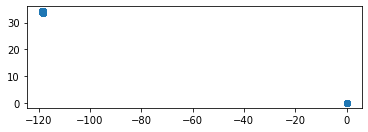

In [6]:
gdf.plot()

### Deleting Row
From the plot I can see that there is a coordinate that is located at (0,0), which does not seem rigth. After looking closer at the data it seems like there is one point that does not have information for lantitude and longitude that is messing with my graph. So I am going to go ahead and cut this data point from my data.

By printing .head(74) I see that the point that I want to get rid of is in row 73. From my CVS file I see that there are 9 points with no data.

In [7]:
gdf.head(73)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO_Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Lat,Long,geometry
0,190617851,8/24/19,8/24/19,1115,6,Hollywood,615,997,TRAFFIC COLLISION,3008,52.0,M,W,101.0,STREET,BARHAM BL,WINNIE DR,34.1347,-118.3427,POINT (-118.34270 34.13470)
1,190715500,8/22/19,8/21/19,2230,7,Wilshire,727,997,TRAFFIC COLLISION,3008,24.0,F,H,101.0,STREET,BEVERLY BL,LA BREA AV,34.0762,-118.3441,POINT (-118.34410 34.07620)
2,190715796,8/27/19,8/27/19,1420,7,Wilshire,745,997,TRAFFIC COLLISION,3008,46.0,M,O,101.0,STREET,LA BREA AV,SYCAMORE AV,34.0562,-118.3449,POINT (-118.34490 34.05620)
3,190814721,8/22/19,8/22/19,1730,8,West LA,842,997,TRAFFIC COLLISION,3008,32.0,M,W,101.0,STREET,SANTA MONICA BL,BARRINGTON AV,34.0465,-118.4588,POINT (-118.45880 34.04650)
4,190814726,8/20/19,8/20/19,825,8,West LA,851,997,TRAFFIC COLLISION,3008,24.0,M,A,101.0,STREET,BROCKTON AV,SANTA MONICA BL,34.0398,-118.4598,POINT (-118.45980 34.03980)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,191514185,7/11/19,7/11/19,1700,15,N Hollywood,1566,997,TRAFFIC COLLISION,3008,53.0,F,W,101.0,STREET,MOORPARK ST,ENSIGN AV,34.1504,-118.3712,POINT (-118.37120 34.15040)
69,190713693,7/16/19,7/16/19,715,7,Wilshire,721,997,TRAFFIC COLLISION,3008,38.0,M,H,101.0,STREET,LA CIENEGA BL,BEVERLY BL,34.0761,-118.3766,POINT (-118.37660 34.07610)
70,191218070,7/11/19,7/11/19,1110,12,77th Street,1256,997,TRAFFIC COLLISION,3008,39.0,M,B,101.0,STREET,74TH ST,VERMONT AV,33.9727,-118.2916,POINT (-118.29160 33.97270)
71,201808992,4/1/20,3/31/20,1650,18,Southeast,1842,997,TRAFFIC COLLISION,3008,48.0,F,H,NaN,NaN,0,NaN,33.9365,-118.2762,POINT (-118.27620 33.93650)


After determining which point need to be cut out, I make list so that I can cut all these points at once.

In [8]:
gdf = gdf.drop([73,869,1340,1351,1844,2033,2963,3092,8025])

After cutting my points, and regrpahing my plot I can see more clearly the data sets that I want to look at.

<AxesSubplot:>

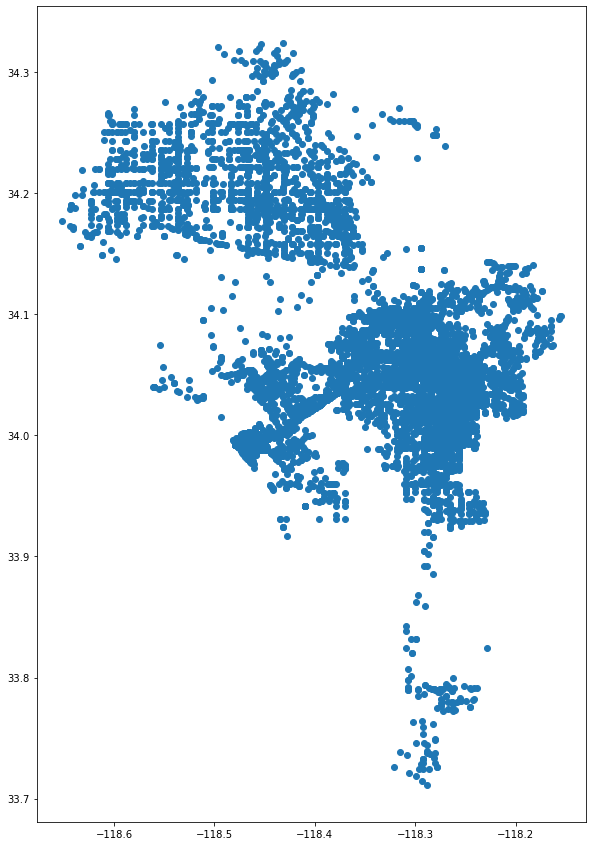

In [9]:
gdf.plot(figsize=(15,15))

Next, I wanted to plot the graph so that column MO Codes would show in different color, since those are the different types of accidents we are looking for. 

<AxesSubplot:>

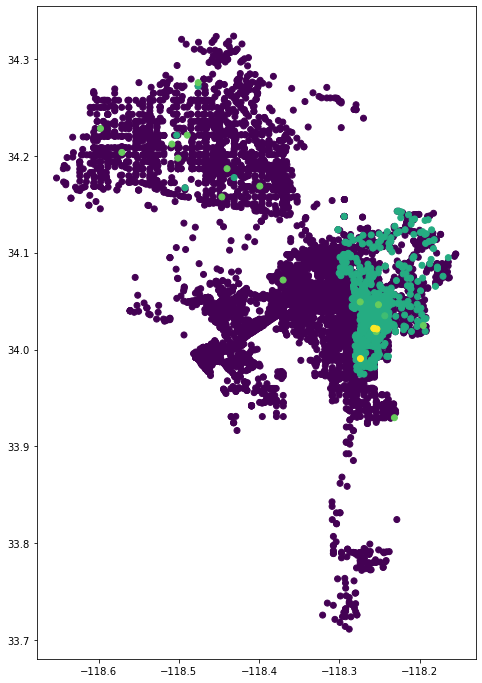

In [10]:
gdf.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'MO_Codes',   # column that defines the color of the dots
)

### Creating a Basemap

To create I am basemap I am uploading more libaries.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Here I put the projection of the map, so that it aligns with my data points.

In [37]:
# reproject to Web Mercator
osm_web_mercator = gdf.to_crs(epsg=3857)

Below I am plotting my points with a basemap.

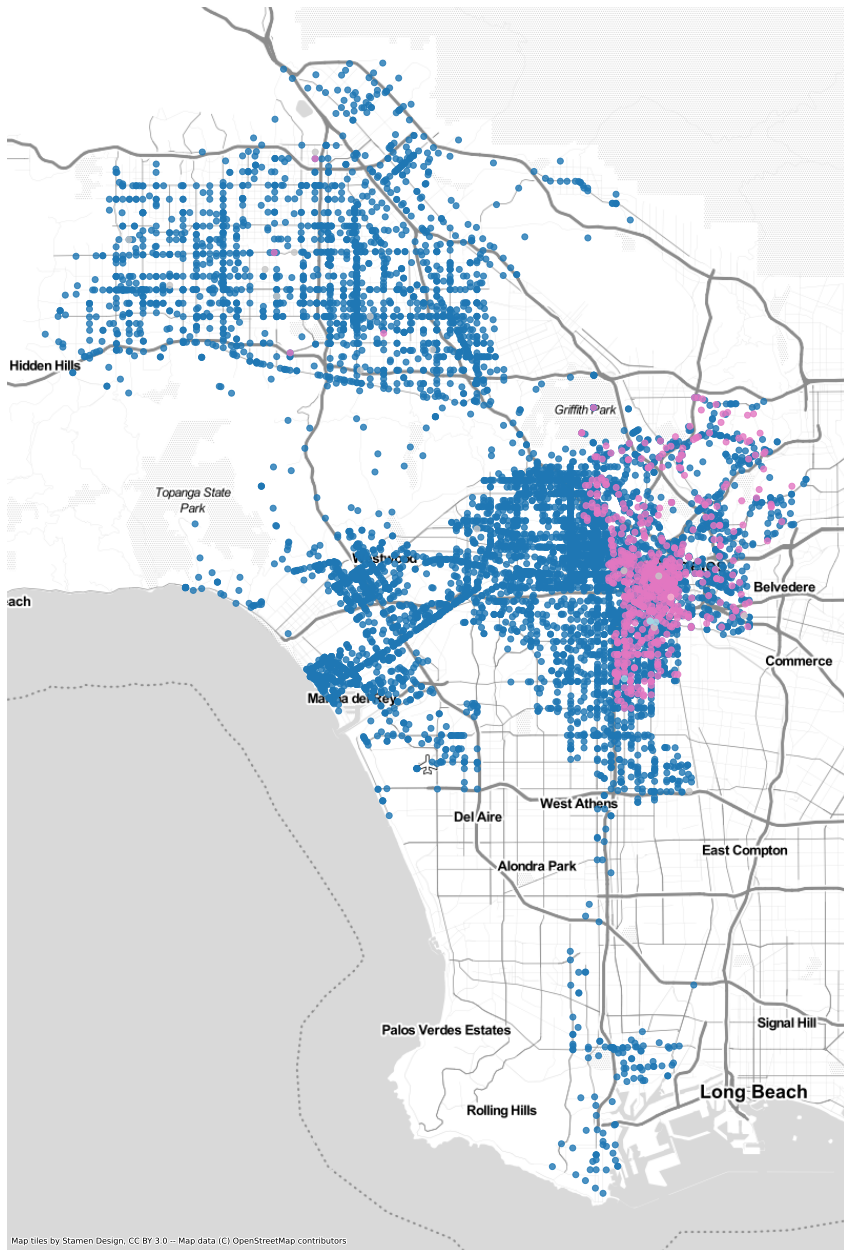

In [44]:
fig,ax = plt.subplots(figsize=(15,25))

osm_web_mercator.plot(ax=ax,
                    column='MO_Codes',
                    cmap='tab20',
                    alpha=0.8,
                   )

# get rid of the axis
ax.axis('off');

# basemap from carto that has a dark background (easier to see)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

### Isochrones Map

First I am going to import more libraries.

In [28]:
# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

Next, I am defining the neighboorhood, network type, trip time, and meters per minute. 

In [29]:
# configure the place, network type, trip times, and travel speed
address = 'Northridge, Los Angeles, CA, USA'
network_type = 'bike'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 75 # travel distance per minute

The next steps tells me how long it takes this cell to run, and in this case dowload the street network.

In [30]:
%%time 

# download the street network
G = ox.graph_from_address(address, network_type=network_type, dist = 2000)

CPU times: user 5.73 s, sys: 95.2 ms, total: 5.83 s
Wall time: 6.02 s


In [31]:
type (G)

networkx.classes.multidigraph.MultiDiGraph

To see what the map looks like I am going to plot it.

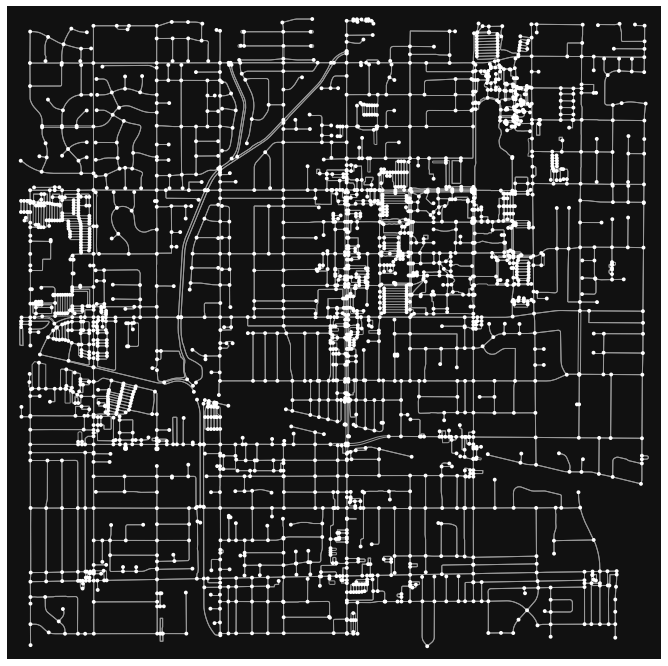

In [32]:
fig, ax = ox.plot_graph(G,figsize=(12,12))

Next, I am going to project it to to the Web Mercator.

In [33]:
G = ox.project_graph(G, to_crs='epsg:3857')

Here, I am coverting the nodes and edged to geodataframes.

In [34]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

Next, I am look at how my data was coverted for both nodes and edges, and plot both.

In [35]:
gdf_nodes

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
122485849,4.060938e+06,-1.319417e+07,3,-118.525225,34.238987,NaN,POINT (-13194167.715 4060937.502)
6027958406,4.060967e+06,-1.319417e+07,5,-118.525233,34.239210,NaN,POINT (-13194168.550 4060967.436)
4709185672,4.060906e+06,-1.319423e+07,3,-118.525741,34.238755,NaN,POINT (-13194225.123 4060906.168)
6468789620,4.060938e+06,-1.319413e+07,3,-118.524849,34.238994,NaN,POINT (-13194125.837 4060938.350)
122582650,4.060027e+06,-1.319311e+07,4,-118.515696,34.232225,stop,POINT (-13193106.919 4060026.930)
...,...,...,...,...,...,...,...
9393832734,4.060468e+06,-1.319667e+07,3,-118.547719,34.235501,NaN,POINT (-13196671.758 4060468.089)
9378188286,4.058890e+06,-1.319650e+07,1,-118.546214,34.223783,NaN,POINT (-13196504.156 4058890.383)
9411340245,4.060614e+06,-1.319402e+07,1,-118.523876,34.236585,NaN,POINT (-13194017.468 4060614.064)


<AxesSubplot:>

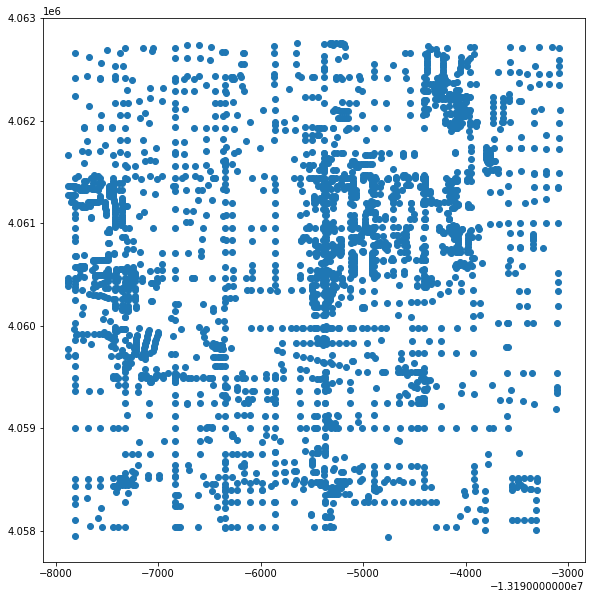

In [12]:
gdf_nodes.plot(figsize=(10,10))


In [36]:
gdf_edges.head()

osmid       highway  oneway  \
u          v          key                                                
122485849  6027958406 0                158611445      cycleway   False   
           4709185672 0    [401278884, 13408862]  unclassified   False   
           6468789620 0                401278884  unclassified   False   
6027958406 4619810401 0                158611445      cycleway   False   
           122485849  0                158611445      cycleway   False   

                           length  \
u          v          key           
122485849  6027958406 0    24.735   
           4709185672 0    68.294   
           6468789620 0    34.595   
6027958406 4619810401 0    61.246   
           122485849  0    24.735   

                                                                    geometry  \
u          v          key                                                      
122485849  6027958406 0    LINESTRING (-13194167.715 4060937.502, -131941...   
           4709185672 0    LINESTRING (-13194167.715 4060937.502, -131941...   
           6468789620 0    LINESTRING (-13194167.715 4060937.502, -131941...   
6027958406 4619810401 0    LINESTRING (-13194168.550 4060967.436, -131941...   
           122485849  0    LINESTRING (-13194168.550 4060967.436, -131941...   

                                                        name maxspeed lanes  \
u          v          key                                                     
122485849  6027958406 0                                  NaN      NaN   NaN   
           4709185672 0    [Bertrand Avenue, Prairie Street]   15 mph     2   
           6468789620 0                       Prairie Street   15 mph   NaN   
6027958406 4619810401 0                                  NaN      NaN   NaN   
           122485849  0                                  NaN      NaN   NaN   

                               access service width tunnel bridge  ref  
u          v          key                                               
122485849  6027958406 0           NaN     NaN   NaN    NaN    NaN  NaN  
           4709185672 0    permissive     NaN   NaN    NaN    NaN  NaN  
           6468789620 0           NaN     NaN   NaN    NaN    NaN  NaN  
6027958406 4619810401 0           NaN     NaN   NaN    NaN    NaN  NaN  
           122485849  0           NaN     NaN   NaN    NaN    NaN  NaN

<AxesSubplot:>

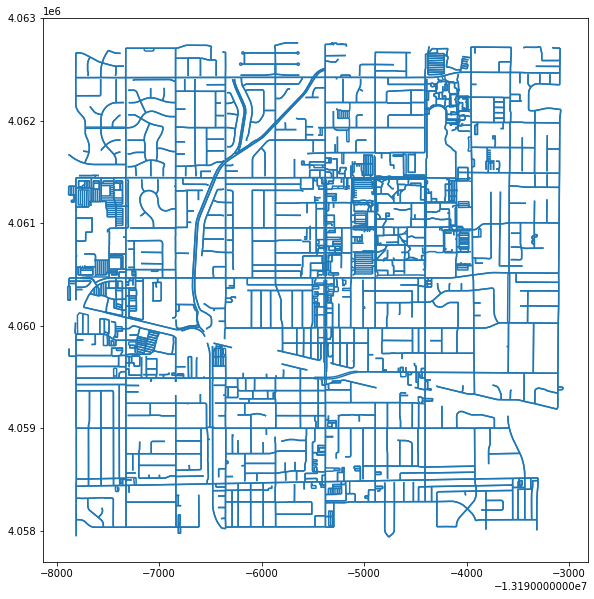

In [37]:
gdf_edges.plot(figsize=(10,10))

### Getting the Centroid

This are by bounding box coordinates that define the area that I am working with.

In [38]:
minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)


-13197884.016434668
4057940.2761872043
-13193081.40417117
4062760.346408995


Here I am calculating the centroid.

In [39]:
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13195482.71030292
4060350.3112980993


### Getting to the Nearest Node to the Centroid

Here I am using the command to get to the nearest node to the centroid.

In [40]:
center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x)
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 6269202269


In [41]:
gdf_nodes.loc[[center_node]]

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
6269202269,4.060332e+06,-1.319549e+07,1,-118.537076,34.234487,NaN,POINT (-13195486.985 4060331.501)


Mapping the Network with Layers

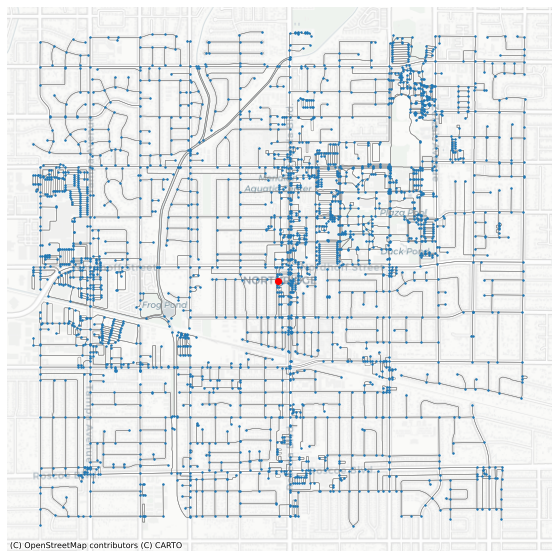

In [42]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
gdf_nodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)

# add the center node in red also to ax
gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

### Calculating Travel Cost 

In [43]:
gdf_edges['bike_time'] = gdf_edges['length']/meters_per_minute

Now we make sure the data makes sense. 

In [44]:
gdf_edges[['osmid','name','highway','length','bike_time']].sample(5)

,,,osmid,name,highway,length,bike_time
u,v,key,,,,,
6680418913,122598550,0,"[401223768, 401223761, 401223751]",Zelzah Avenue,primary,179.893,2.398573
6269202263,6269202270,0,13281999,Baird Avenue,residential,14.366,0.191547
4821325736,4821325735,0,489934367,NaN,service,70.687,0.942493
7433077850,7433077845,0,794712240,NaN,service,27.607,0.368093
123455360,123175045,0,32679392,Shoshone Avenue,residential,120.735,1.609800


### Putting Colors on the Map

1. I will be assigning hex code for each trip isochrome.

In [46]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 10, 15, 20]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


2. Here I am reversing the colos so the farker the color corresponds to the longer time.

In [47]:
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[20, 15, 10, 5]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


3. I am now creating a list of zipped time and colors.

In [48]:
time_color = list(zip(trip_times, iso_colors))
time_color

[(20, '#0d0887'), (15, '#9c179e'), (10, '#ed7953'), (5, '#f0f921')]

In [49]:
# loop through the list of time/colors
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 20 minutes is #0d0887
The color for 15 minutes is #9c179e
The color for 10 minutes is #ed7953
The color for 5 minutes is #f0f921


4. To determine which color falls withing each radious I will through each time and associated color. 

In [50]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, center_node, radius=time)

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes.loc[node,'color'] = color

There are 693 nodes within 20 minutes 
There are 318 nodes within 15 minutes 
There are 139 nodes within 10 minutes 
There are 32 nodes within 5 minutes 


5. Next, I will need to populate each corresponding point with the approriate color.

In [51]:
gdf_nodes['color'].fillna('#cccccc', inplace=True)

6. Now I am going to plot it 

<AxesSubplot:>

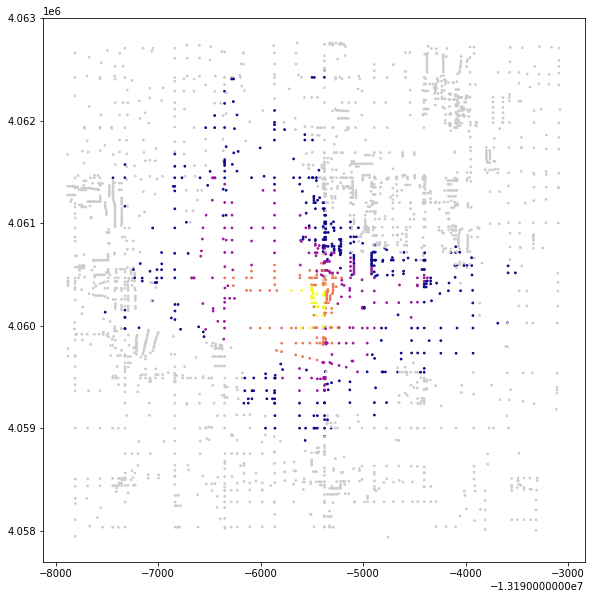

In [52]:
gdf_nodes.plot(figsize=(10,10),
               color=gdf_nodes['color'],
               markersize=3)

### Creating Polygon

1. I am defining my variable for 5 minutes.
2. Next I am plotting these points.
3. Lastly I am making a polygon from these points. 

In [53]:
gdf_5 = gdf_nodes[gdf_nodes['time']=='5 mins']

<AxesSubplot:>

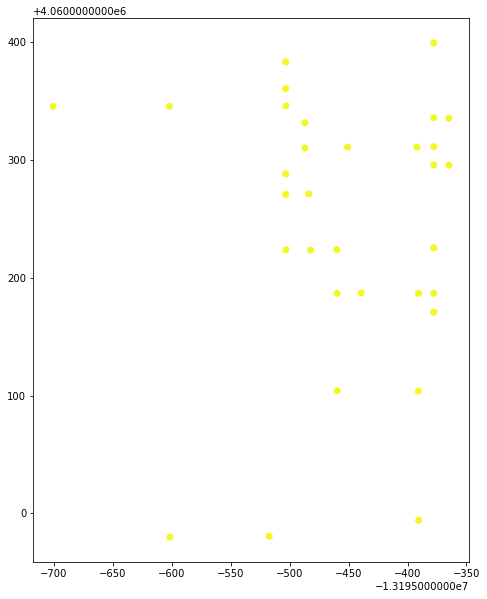

In [54]:
gdf_5.plot(figsize=(10,10),color=gdf_5.color)

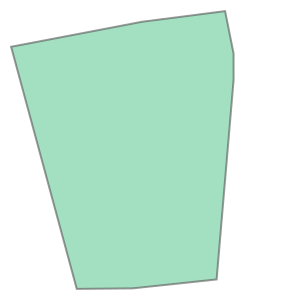

In [55]:
gdf_5.unary_union.convex_hull

4. We are now going to do the same to the other different times by dissovilg the nodes by time. 

In [57]:
isochrones = gdf_nodes.dissolve("time")
isochrones

,geometry,y,x,street_count,lon,lat,highway,color
time,,,,,,,,
10 mins,"MULTIPOINT (-13196350.824 4060468.654, -131962...",4.059984e+06,-1.319525e+07,3,-118.534923,34.231902,traffic_signals,#ed7953
15 mins,"MULTIPOINT (-13196673.395 4060468.089, -131966...",4.060227e+06,-1.319477e+07,3,-118.530650,34.233709,stop,#9c179e
20 mins,"MULTIPOINT (-13197516.773 4060133.838, -131974...",4.060030e+06,-1.319359e+07,4,-118.520065,34.232249,stop,#0d0887
5 mins,"MULTIPOINT (-13195700.863 4060345.517, -131956...",4.059981e+06,-1.319552e+07,4,-118.537350,34.231881,None,#f0f921


5. For each row I am creating a hull.

In [58]:
isochrones = isochrones.convex_hull.reset_index()
isochrones

,time,0
0,10 mins,"POLYGON ((-13195450.439 4059667.448, -13195522..."
1,15 mins,"POLYGON ((-13195622.249 4059368.967, -13196537..."
2,20 mins,"POLYGON ((-13195566.534 4058883.288, -13195953..."
3,5 mins,"POLYGON ((-13195601.711 4059979.831, -13195700..."


6. Next I am renaming the columns. 

In [61]:
isochrones.columns=['time','geometry']

7. Now I plot it

<AxesSubplot:>

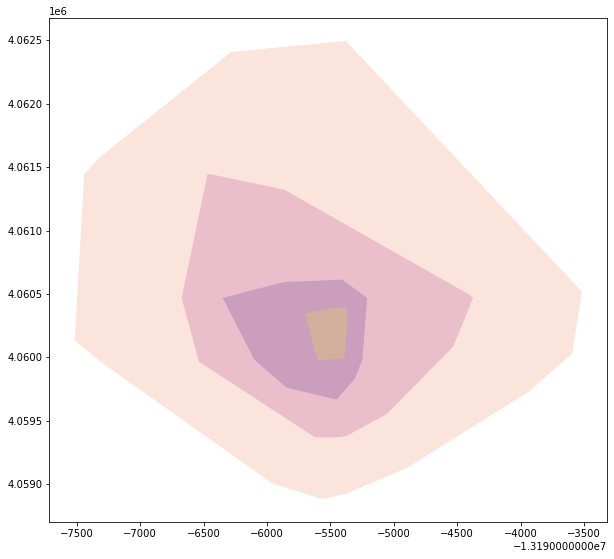

In [62]:
isochrones.plot(figsize=(10,10),alpha=0.2,cmap='plasma')

### Graphing All different components together.

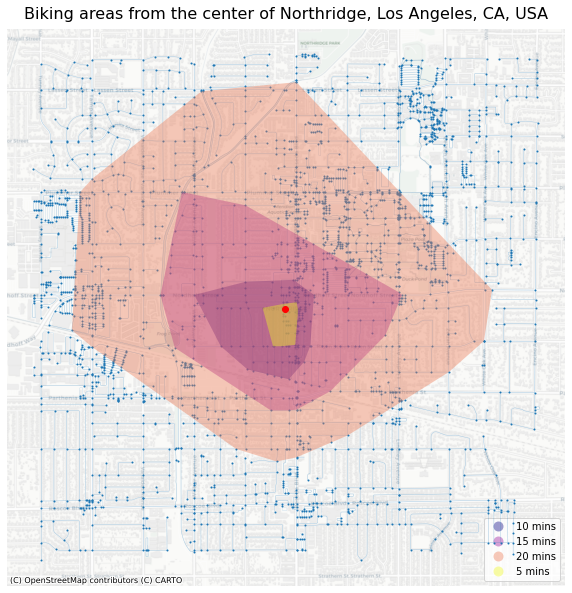

In [65]:
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrones
isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

# add the center node in red
gdf_nodes.loc[[center_node]].plot(ax=ax,color='r', zorder=30)

# add all nodes
gdf_nodes.plot(ax=ax, 
               markersize=1, 
               zorder=10)

# add the edges
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Biking areas from the center of ' + address,fontsize=16,pad=10)

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)